In [ ]:
##Jake Affaneh-uploading the video file and cropping the first image to identify lane lines

In [ ]:
import cv2

In [ ]:
parser = argparse.ArgumentParser()

In [1]:
import argparse

In [2]:
from IPython.display import Video

In [3]:
Video("Lab1VideoClip10Sec.mp4")

In [4]:
import matplotlib.pylab as plt

In [5]:
import cv2

In [6]:
import numpy as np

In [10]:
image = cv2.imread("ImageLab1.png")

In [ ]:
##gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [11]:
def show_with_matplotlib(color_img, title, pos): """Shows an image using matplotlib capabilities"""

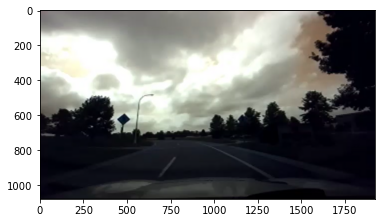

In [12]:
plt.imshow(image)

In [13]:
plt.figure(figsize=(12, 6))
plt.suptitle("Comparing different kernels using cv2.filter2D()", fontsize=14, fontweight='bold')


Text(0.5, 0.98, 'Comparing different kernels using cv2.filter2D()')

<Figure size 864x432 with 0 Axes>

In [14]:
kernel_identity = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

In [15]:
sobel_y_kernel = np.array([[2, 4, 2],
                           [6, 6, 6],
                           [-6, -12, -6]])

In [16]:
sobel_y_image = cv2.filter2D(image, -5, sobel_y_kernel)

In [17]:
show_with_matplotlib(sobel_y_image, "sobel y image", 100)

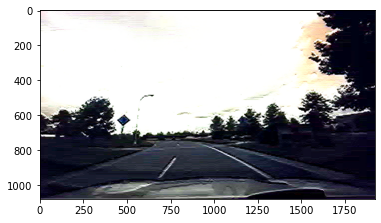

In [18]:
plt.imshow(sobel_y_image)

In [19]:
image = cv2.cvtColor(sobel_y_image, cv2.COLOR_BGR2RGB)

In [20]:
print(image.shape)

(1080, 1920, 3)


In [21]:
height = image.shape[0]

In [22]:
width = image.shape[1]

In [23]:
region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]

In [24]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [25]:
canny_image = cv2.Canny(sobel_y_image, 400, 500)

In [28]:
cropped_image = region_of_interest(sobel_y_image,
                                  np.array([region_of_interest_vertices],np.int32))

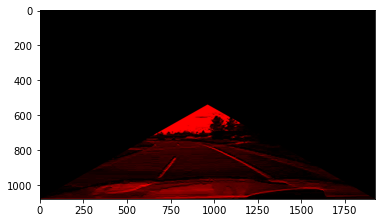

In [29]:
plt.imshow(cropped_image)